Python 3.11.2에 연결됨

In [91]:
filePath = 'C:/Users/준식/Desktop/ㅈㅍ/9-19/GlossySnake/src/tools/data/schubert.md'
with  open(filePath,'r',encoding='UTF8') as f: # 본인 경로 설정 필요
    lines = f.read()

# 문단을 '#' 기호를 기준으로 분할하고 각 문단을 처리
paragraphs = lines.strip().split('\n#')
texts_a = [{"original_text": para.strip()} for para in paragraphs if para.strip()]

if texts_a and texts_a[0]['original_text'].startswith('# '):
    texts_a[0]['original_text'] = texts_a[0]['original_text'][2:]  # '# ' 제거

for text in texts_a:
    print(text)

{'original_text': 'Die Wetterfahne.\n\nDer Wind spielt mit der Wetterfahne\nAuf meines schönen Liebchens Haus.\nDa dacht’ ich schon in meinem Wahne,\nSie pfiff’ den armen Flüchtling aus.\n\nEr hätt’ es ehr bemerken sollen,\nDes Hauses aufgestecktes Schild,\nSo hätt’ er nimmer suchen wollen\nIm Haus’ ein treues Frauenbild.\n\nDer Wind spielt drinnen mit den Herzen,\nWie auf dem Dach, nur nicht so laut.\nWas fragen sie nach meinen Schmerzen?\nIhr Kind ist eine reiche Braut.'}
{'original_text': 'Gefrorene Thränen.\n\nGefrorne Tropfen fallen\nVon meinen Wangen ab:\nUnd ist’s mir denn entgangen,\nDaß ich geweinet hab’?\n\nEi Thränen, meine Thränen,\nUnd seid ihr gar so lau,\nDaß ihr erstarrt zu Eise,\nWie kühler Morgenthau?\n\nUnd dringt doch aus der Quelle\nDer Brust so glühend heiß,\nAls wolltet ihr zerschmelzen\nDes ganzen Winters Eis.'}
{'original_text': 'Erstarrung.\n\nIch such’ im Schnee vergebens\nNach ihrer Tritte Spur,\nHier, wo wir oft gewandelt\nSelbander durch die Flur.\n\nIch w

In [76]:
import requests
import json
import math
import time

HOST = "http://127.0.0.1:56123"

REGISTRATION_URL = f"{HOST}/api/v4/rest-auth/registration/"
LOGIN_URL = f"{HOST}/api/v4/rest-auth/login/"
LOGOUT_URL = f"{HOST}/api/v4/rest-auth/logout/"
UPLOAD_URL = f"{HOST}/api/v4/upload"
DIVIDE_URL = f"{HOST}/api/v4/parser/divide"
PARSE_URL = f"{HOST}/api/v4/parser/parse"
ANNOTATE_URL = f"{HOST}/api/v4/annotator/annotate"
CORPUSES_URL = f"{HOST}/api/v4/corpuses/"

url = "http://127.0.0.1:56123"


In [77]:
join_membership = {
    "username": "abc111",
    "email": "abcdefghi12@naver.com",
    "password1": "testaaaaaa!",
    "password2": "testaaaaaa!"
}

join_membership_response = requests.post(REGISTRATION_URL, data=join_membership)

login = {
    "username": "abc111",
    "email": "abcdefghi12@naver.com",
    "password": "testaaaaaa!"
}

login_response= requests.post(LOGIN_URL, json=login)
login_data = login_response.json()
token = login_data.get('key')

login_key = {
    'Authorization': f'Token {token}'
}


In [78]:
time_list = []
annotate_list = []
unit_time_list = []
annotators = ["chatgpt_ft0", "chatgpt_gpt-3.5-turbo-untrained_0","chatgpt_gpt-3.5-turbo-pretrained_0","chatgpt_gpt-4o-mini-untrained_0","chatgpt_gpt-4o-mini-pretrained_0"]

for annotator_name in annotators:
    for text in texts_a:
        upload_response = requests.post(UPLOAD_URL, json=text, headers=login_key)
        corpus_id = upload_response.json().get('corpus_id')

        divide_data = {
            "corpus_id": corpus_id,
            "divide_options": json.dumps({"p_delims": ["\n"]})
        }
        divide_response = requests.post(DIVIDE_URL, json=divide_data, headers=login_key)

        parse_data = {
            "corpus_id": corpus_id,
            "parse_options": json.dumps({"t_delims": " \t\n\r\u000b\f"})
        }
        parse_response = requests.post(PARSE_URL, json=parse_data, headers=login_key)

        start = time.time()

        annotate_data = {
            "corpus_id": corpus_id,
            "annotate_options": json.dumps({
                "lang_from": "German",
                "lang_to": "English",
                "annotator_name": annotator_name
            })
        }
        annotate_response = requests.post(ANNOTATE_URL, json=annotate_data, headers=login_key)
        
        end = time.time()
        print(annotator_name)
        print(f"{end - start:.5f} sec")
        unit_time_list.append((annotator_name,end - start))
        time_list.append(end - start)
        annotate_list.append(annotator_name)
        translations.append((text['original_text'], annotator_name, end - start))


chatgpt_ft0
1.73490 sec
chatgpt_ft0
20.69684 sec
chatgpt_ft0
40.56438 sec
chatgpt_ft0
20.65543 sec
chatgpt_ft0
30.22300 sec
chatgpt_gpt-3.5-turbo-untrained_0
21.63302 sec
chatgpt_gpt-3.5-turbo-untrained_0
19.78335 sec
chatgpt_gpt-3.5-turbo-untrained_0
34.34637 sec
chatgpt_gpt-3.5-turbo-untrained_0
23.80199 sec
chatgpt_gpt-3.5-turbo-untrained_0
30.63671 sec
chatgpt_gpt-3.5-turbo-pretrained_0
23.22893 sec
chatgpt_gpt-3.5-turbo-pretrained_0
19.37959 sec
chatgpt_gpt-3.5-turbo-pretrained_0
39.83143 sec
chatgpt_gpt-3.5-turbo-pretrained_0
20.74460 sec
chatgpt_gpt-3.5-turbo-pretrained_0
34.40911 sec
chatgpt_gpt-4o-mini-untrained_0
24.17600 sec
chatgpt_gpt-4o-mini-untrained_0
20.72574 sec
chatgpt_gpt-4o-mini-untrained_0
36.60688 sec
chatgpt_gpt-4o-mini-untrained_0
25.37430 sec
chatgpt_gpt-4o-mini-untrained_0
31.87741 sec
chatgpt_gpt-4o-mini-pretrained_0
19.70035 sec
chatgpt_gpt-4o-mini-pretrained_0
19.12005 sec
chatgpt_gpt-4o-mini-pretrained_0
42.22180 sec
chatgpt_gpt-4o-mini-pretrained_0
22.41

In [79]:
corpuses_respons = requests.get(CORPUSES_URL, headers=login_key)
corpuse_history = corpuses_respons.json()
rate_list = []
texts_len = len(texts_a) 
num = int(corpuse_history[-1].get('corpus_id'))  # 마지막 코퍼스의 ID 가져오기
first = num - (texts_len*len(annotators))
number2 = 0

for number in range(first, num):
    Unknown_count = 0
    token_sum = 0
    for corpus_record in corpuse_history[number]['corpuses_history']:
        for paragraph in corpus_record['paragraphs']:
            if paragraph['pstate'] == "ANNOTATED":
                for token in paragraph.get('tokens', []):
                    if not token['is_delimiter']:
                        token_sum += 1
                        if token.get('gloss') == "!UNKNOWN" or token.get('gloss') is None:
                            Unknown_count += 1
                            print(token)

    if token_sum > 0:
        Return_rate = ((token_sum - Unknown_count) / token_sum) * 100
        rate_list.append(Return_rate)
        print(number2, "annotator_name:", annotate_list[number2], "time:", round(float(time_list[number2]), 2), ", return_rate:", round(Return_rate, 2))
        
    else:
        print(number, "time:", round(float(time_list[number2]), 2), ", No tokens to calculate return rate")
        
    number2 += 1


0 time: 1.73 , No tokens to calculate return rate
1 annotator_name: chatgpt_ft0 time: 20.7 , return_rate: 100.0
2 annotator_name: chatgpt_ft0 time: 40.56 , return_rate: 100.0
3 annotator_name: chatgpt_ft0 time: 20.66 , return_rate: 100.0
4 annotator_name: chatgpt_ft0 time: 30.22 , return_rate: 100.0
5 annotator_name: chatgpt_gpt-3.5-turbo-untrained_0 time: 21.63 , return_rate: 100.0
6 annotator_name: chatgpt_gpt-3.5-turbo-untrained_0 time: 19.78 , return_rate: 100.0
7 annotator_name: chatgpt_gpt-3.5-turbo-untrained_0 time: 34.35 , return_rate: 100.0
8 annotator_name: chatgpt_gpt-3.5-turbo-untrained_0 time: 23.8 , return_rate: 100.0
9 annotator_name: chatgpt_gpt-3.5-turbo-untrained_0 time: 30.64 , return_rate: 100.0
10 annotator_name: chatgpt_gpt-3.5-turbo-pretrained_0 time: 23.23 , return_rate: 100.0
11 annotator_name: chatgpt_gpt-3.5-turbo-pretrained_0 time: 19.38 , return_rate: 100.0
12 annotator_name: chatgpt_gpt-3.5-turbo-pretrained_0 time: 39.83 , return_rate: 100.0
13 annotator_n

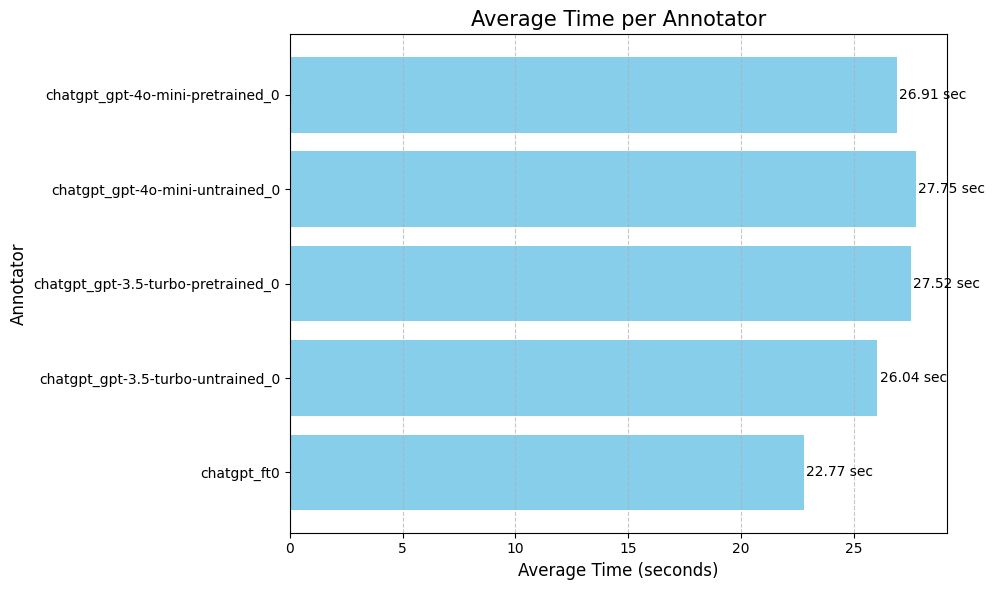

In [80]:
import matplotlib.pyplot as plt
import numpy as np

annotator_dict = {}
for annotator, time in zip(annotate_list, time_list):
    if annotator in annotator_dict:
        annotator_dict[annotator].append(time)
    else:
        annotator_dict[annotator] = [time]


annotator_avg = {k: np.mean(v) for k, v in annotator_dict.items()}

names = list(annotator_avg.keys())
avg_times = list(annotator_avg.values())

plt.figure(figsize=(10, 6))
bars = plt.barh(names, avg_times, color='skyblue')

# 각 막대 옆에 값 표시
for bar, avg_time in zip(bars, avg_times):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{avg_time:.2f} sec', va='center')

plt.xlabel('Average Time (seconds)', fontsize=12)
plt.ylabel('Annotator', fontsize=12)
plt.title('Average Time per Annotator', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # X축에 점선 그리드 추가

plt.tight_layout()  
plt.show()

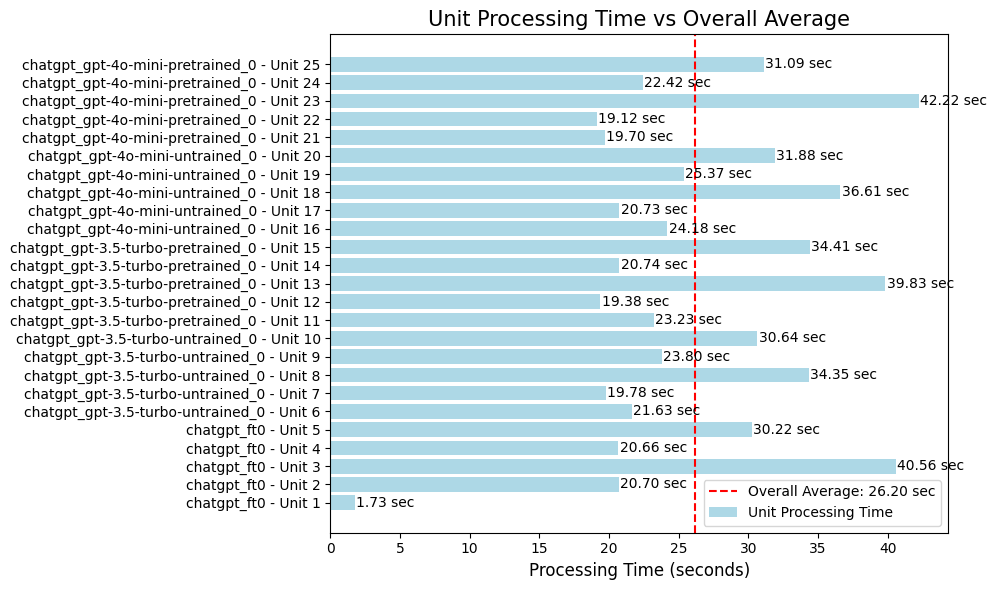

전체 평균보다 시간이 더 걸린 유닛의 개수: 10
전체 평균보다 시간이 덜 걸린 유닛의 개수: 15


In [81]:
total_avg_time = np.mean(time_list)

#Annotator별 유닛 성능과 전체 평균 비교
annotator_avg_times = {}
for annotator, time in unit_time_list:
    if annotator in annotator_avg_times:
        annotator_avg_times[annotator].append(time)
    else:
        annotator_avg_times[annotator] = [time]

annotator_avg = {annotator: np.mean(times) for annotator, times in annotator_avg_times.items()}


plt.figure(figsize=(10, 6))

# 유닛별 처리 시간 시각화
unit_times = [unit_time for _, unit_time in unit_time_list]
unit_labels = [f"{annotator} - Unit {i+1}" for i, (annotator, _) in enumerate(unit_time_list)]
y_pos = np.arange(len(unit_times))

plt.barh(y_pos, unit_times, color='lightblue', label='Unit Processing Time')

# 전체 평균 선 그리기
plt.axvline(total_avg_time, color='red', linestyle='--', label=f'Overall Average: {total_avg_time:.2f} sec')

# 각 유닛별 처리 시간 옆에 값 표시
for i, unit_time in enumerate(unit_times):
    plt.text(unit_time + 0.1, i, f'{unit_time:.2f} sec', va='center')

plt.yticks(y_pos, unit_labels)
plt.xlabel('Processing Time (seconds)', fontsize=12)
plt.title('Unit Processing Time vs Overall Average', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()

above_average = [unit_time for unit_time in unit_times if unit_time > total_avg_time]
below_average = [unit_time for unit_time in unit_times if unit_time <= total_avg_time]

print(f"전체 평균보다 시간이 더 걸린 유닛의 개수: {len(above_average)}")
print(f"전체 평균보다 시간이 덜 걸린 유닛의 개수: {len(below_average)}")

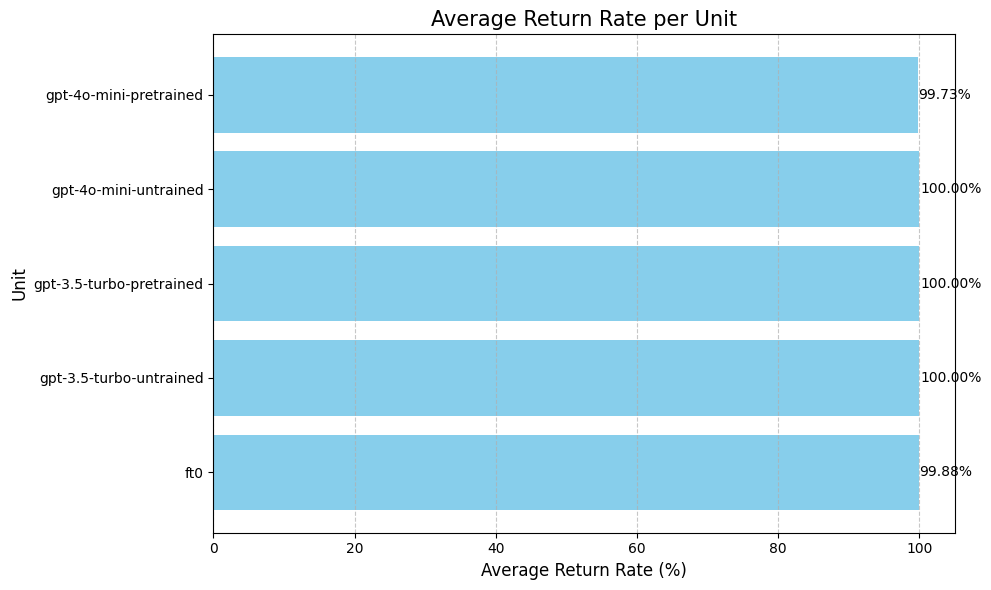

In [69]:
annotator_dict = {}
for annotator, rate in zip(annotate_list, rate_list):
    if annotator in annotator_dict:
        annotator_dict[annotator].append(rate)
    else:
        annotator_dict[annotator] = [rate]

annotator_avg = {k: np.mean(v) for k, v in annotator_dict.items()}

names = list(annotator_avg.keys())
avg_rates = list(annotator_avg.values())

plt.figure(figsize=(10, 6))
bars = plt.barh(names, avg_rates, color='skyblue')

# 각 막대 옆에 평균 Return Rate 값 표시
for bar, avg_rate in zip(bars, avg_rates):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{avg_rate:.2f}%', va='center')

plt.xlabel('Average Return Rate (%)', fontsize=12)
plt.ylabel('Annotator', fontsize=12)
plt.title('Average Return Rate per Annotator', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # X축에 점선 그리드 추가

plt.tight_layout()  
plt.show()

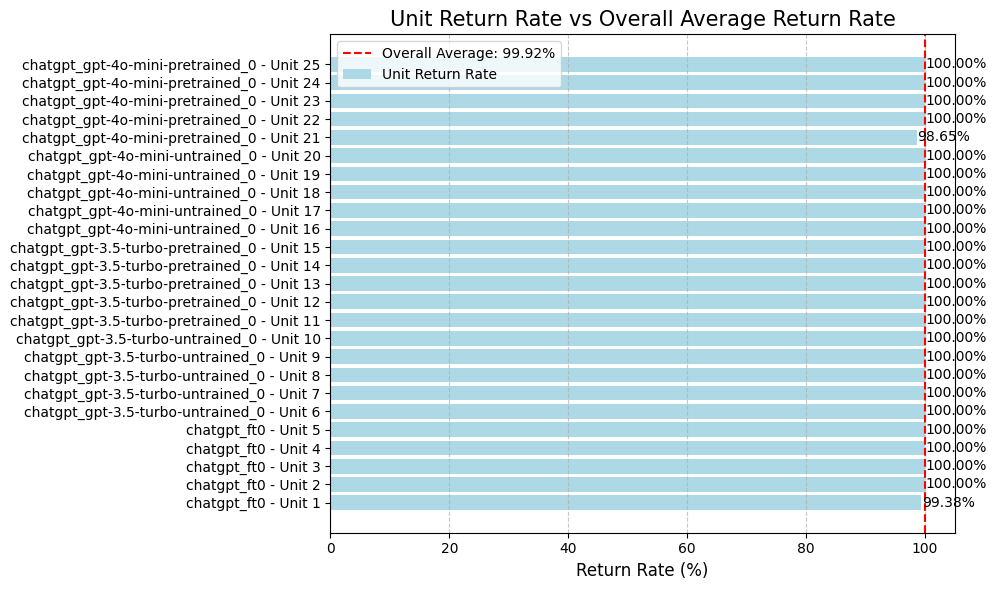

In [66]:
annotator_dict = {}
for annotator, rate in zip(annotate_list, rate_list):
    if annotator in annotator_dict:
        annotator_dict[annotator].append(rate)
    else:
        annotator_dict[annotator] = [rate]


annotator_avg_rates = {k: np.mean(v) for k, v in annotator_dict.items()}

# 유닛별 Return Rate 및 평균 Return Rate 시각화
unit_return_rates = []  
unit_labels = []        

for i, (annotator, rate) in enumerate(zip(annotate_list, rate_list)):
    unit_return_rates.append(rate)
    unit_labels.append(f"{annotator} - Unit {i + 1}")


overall_avg_rate = np.mean(list(annotator_avg_rates.values()))


plt.figure(figsize=(10, 6))

# 유닛별 Return Rate 시각화
bars = plt.barh(unit_labels, unit_return_rates, color='lightblue', label='Unit Return Rate')

# 전체 평균 Return Rate 선 그리기
plt.axvline(overall_avg_rate, color='red', linestyle='--', label=f'Overall Average: {overall_avg_rate:.2f}%')

# 각 유닛별 Return Rate 옆에 값 표시
for i, rate in enumerate(unit_return_rates):
    plt.text(rate + 0.1, i, f'{rate:.2f}%', va='center')

plt.xlabel('Return Rate (%)', fontsize=12)
plt.title('Unit Return Rate vs Overall Average Return Rate', fontsize=15)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()